In [28]:
import sklearn
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf


Wine data set

https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

In [2]:
from sklearn import datasets

digits = datasets.load_digits(as_frame=True)
X = digits.data
y = digits.target

In [3]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
X.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


<Figure size 432x288 with 0 Axes>

<Figure size 72x72 with 0 Axes>

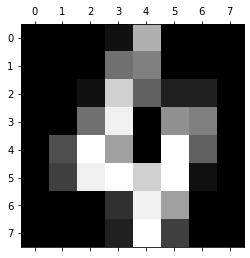

In [11]:
import matplotlib.pyplot as plt
plt.gray()
plt.figure(figsize=(1, 1))
plt.matshow(digits.images[4])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Softmax Regression With SKLearn

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    multi_class='multinomial',
    tol=1e-4,
    solver='newton-cg',
    max_iter=1000,
    verbose=1,
    penalty='l2'
).fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


In [15]:
from sklearn.metrics import log_loss
import math

y_prob = lr_model.predict_proba(X)
mlogloss = log_loss(y, y_prob)

print("Logloss: {}".format(mlogloss))


Logloss: 0.034208230618038155


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
CATEGORIES = list(range(0, 10))


In [46]:
y_hat = lr_model.predict(X_validation)

In [47]:
print(classification_report(y_true=y_validation, y_pred=y_hat, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     0.9655    1.0000    0.9825        28
           2     0.9706    1.0000    0.9851        33
           3     0.9706    0.9706    0.9706        34
           4     1.0000    0.9783    0.9890        46
           5     0.9167    0.9362    0.9263        47
           6     0.9714    0.9714    0.9714        35
           7     1.0000    0.9706    0.9851        34
           8     0.9667    0.9667    0.9667        30
           9     0.9744    0.9500    0.9620        40

    accuracy                         0.9722       360
   macro avg     0.9736    0.9744    0.9739       360
weighted avg     0.9726    0.9722    0.9723       360



In [50]:
cm = confusion_matrix(y_true=y_validation, y_pred=y_hat, labels=CATEGORIES)

In [51]:
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

# Gradient Boost Tree with Xgboost

In [23]:
from xgboost import XGBClassifier

my_model = XGBClassifier(
    base_score=0.5,
    objective='multi:softmax',
    num_class=10,
    
    gamma=0,
    max_depth=5,
    learning_rate=0.3, 
    min_child_weight=1,
    n_estimators=100,
    subsample=0.8,
    colsample_bynode=1,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,

    random_state=0,
    booster='gbtree',
    tree_method='hist',
    seed=1234,
    missing=-1,
    verbosity=1
)

print(my_model.get_xgb_params())

trained = my_model.fit(
    X_train, y_train, early_stopping_rounds=5,
    # the last metric is used for early stopping
    eval_metric=["merror", "mlogloss"],
    eval_set=[(X_train, y_train), (X_validation, y_validation)], verbose=True)


{'objective': 'multi:softmax', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_delta_step': None, 'max_depth': 5, 'min_child_weight': 1, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': 1, 'num_class': 10, 'seed': 1234}
[0]	validation_0-merror:0.06889	validation_0-mlogloss:1.30873	validation_1-merror:0.13056	validation_1-mlogloss:1.37365
[1]	validation_0-merror:0.03340	validation_0-mlogloss:0.94138	validation_1-merror:0.09722	validation_1-mlogloss:1.04528
[2]	validation_0-merror:0.02018	validation_0-mlogloss:0.71044	validation_1-merror:0.07500	validation_1-mlogloss:0.82738
[3]	validation_0-merror:0.01113	validation_0-mlogloss:0.54289	validation_1-merro

/Users/lzhao/opt/miniconda3/envs/ml_dev2/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-merror:0.00000	validation_0-mlogloss:0.05237	validation_1-merror:0.04167	validation_1-mlogloss:0.16196
[16]	validation_0-merror:0.00000	validation_0-mlogloss:0.04555	validation_1-merror:0.04444	validation_1-mlogloss:0.15194
[17]	validation_0-merror:0.00000	validation_0-mlogloss:0.03985	validation_1-merror:0.03889	validation_1-mlogloss:0.14387
[18]	validation_0-merror:0.00000	validation_0-mlogloss:0.03517	validation_1-merror:0.03889	validation_1-mlogloss:0.13788
[19]	validation_0-merror:0.00000	validation_0-mlogloss:0.03151	validation_1-merror:0.03889	validation_1-mlogloss:0.13294
[20]	validation_0-merror:0.00000	validation_0-mlogloss:0.02849	validation_1-merror:0.03611	validation_1-mlogloss:0.12778
[21]	validation_0-merror:0.00000	validation_0-mlogloss:0.02593	validation_1-merror:0.03333	validation_1-mlogloss:0.12468
[22]	validation_0-merror:0.00000	validation_0-mlogloss:0.02373	validation_1-merror:0.03333	validation_1-mlogloss:0.12058
[23]	validation_0-merror:0.00000

In [52]:
y_hat = trained.predict(X_validation)
print(classification_report(y_true=y_validation, y_pred=y_hat, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     0.9706    1.0000    0.9851        33
           3     1.0000    0.9706    0.9851        34
           4     1.0000    1.0000    1.0000        46
           5     0.9574    0.9574    0.9574        47
           6     0.9714    0.9714    0.9714        35
           7     0.9429    0.9706    0.9565        34
           8     1.0000    0.9667    0.9831        30
           9     0.9500    0.9500    0.9500        40

    accuracy                         0.9778       360
   macro avg     0.9792    0.9787    0.9789       360
weighted avg     0.9780    0.9778    0.9778       360



In [53]:
cm = confusion_matrix(y_true=y_validation, y_pred=y_hat, labels=CATEGORIES)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 38]])

# Simple CNN

In [66]:
import tensorflow as tf

from tensorflow import keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, History, ReduceLROnPlateau, TensorBoard, EarlyStopping
from tensorflow.keras.layers import Activation, BatchNormalization, Input, Reshape, Dense, Conv2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.metrics import CategoricalAccuracy, SparseCategoricalCrossentropy, SparseCategoricalAccuracy


In [69]:
def build_cnn():
    inputs = Input(shape=(64,))
    l = inputs
    
    l = Reshape((8,8,1), name='reshape')(l)
    l = Conv2D(
        filters=16,kernel_size=[3,3],
        padding='same',activation='relu', name='conv1')(l)
    l = BatchNormalization()(l)
    l = Dropout(0.2)(l)

    
    l = Conv2D(
        filters=4,kernel_size=[3,3],
        padding='same',activation='relu', name='conv2')(l)
    l = BatchNormalization()(l)

    
    l = Reshape((4*8*8,), name='flatten')(l)
    l = Dense(10, activation="softmax", name='main_output')(l)


    m_cnn = Model(inputs=inputs, outputs=l)
    print(m_cnn.summary())
    return m_cnn

def model_train(X_train, y_train, X_val, y_val, model):
    print(model.summary())
    early_stop = EarlyStopping(
        monitor="val_loss", min_delta=1e-5, patience=3,
        verbose=0, mode="auto", baseline=None, restore_best_weights=True
    )
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=1, min_lr=1e-4)

    callbacks_list = [early_stop, reduce_lr]

    # optimizer: gradient descent implementation
    adam_wn = Adam(learning_rate=0.1)
    
    # compile model with loss and optimizer; loss function needs to match the intention and the output of the last layer
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam_wn,
        metrics=[SparseCategoricalAccuracy()]
    )
    
    # kick off model training
    return model.fit(
        x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=16,
        epochs=1000, verbose=1, shuffle=True,
        callbacks=callbacks_list)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [40]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [70]:

my_tf_model = build_cnn()

model_train(X_train_scaled, y_train, X_validation_scaled, y_validation, my_tf_model)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 1)           0         
_________________________________________________________________
conv1 (Conv2D)               (None, 8, 8, 16)          160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 4)           580       
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 4)           16  

In [71]:
import numpy as np
y_hat = np.argmax(my_tf_model.predict(X_validation_scaled), axis=1)
print(classification_report(y_true=y_validation, y_pred=y_hat, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    0.9706    0.9851        34
           4     1.0000    1.0000    1.0000        46
           5     0.9787    0.9787    0.9787        47
           6     0.9722    1.0000    0.9859        35
           7     1.0000    0.9706    0.9851        34
           8     1.0000    1.0000    1.0000        30
           9     0.9756    1.0000    0.9877        40

    accuracy                         0.9917       360
   macro avg     0.9927    0.9920    0.9922       360
weighted avg     0.9918    0.9917    0.9917       360



In [72]:
cm = confusion_matrix(y_true=y_validation, y_pred=y_hat, labels=CATEGORIES)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])